# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
# Execute a get request
btc_info = requests.get(btc_url)

# Print `response_btc variable`
btc_info

<Response [200]>

In [7]:
# Store response using `content` attribute
btc_content = btc_info.content
print(btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18979325,\n\t\t\t"total_supply": 18979325,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 39147.0000000000000000,\n\t\t\t\t\t"volume_24h": 26866747626,\n\t\t\t\t\t"market_cap": 742988405806,\n\t\t\t\t\t"percentage_change_1h": -0.1843840668080190,\n\t\t\t\t\t"percentage_change_24h": -7.1193998973012600,\n\t\t\t\t\t"percentage_change_7d": -10.9899461423643000,\n\t\t\t\t\t"percent_change_1h": -0.1843840668080190,\n\t\t\t\t\t"percent_change_24h": -7.1193998973012600,\n\t\t\t\t\t"percent_change_7d": -10.9899461423643000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 50202.1128,\n\t\t\t\t\t"volume_24h": 34453917155.5824,\n\t\t\t\t\t"market_cap": 952808331605.614,\n\t\t\t\t\t"percent_change_1h": -0.1843840668080190,\n\t\t\t\t\t"percent_change_24h": -7.1193998973012600,\n\t\t\t

In [8]:
# Format data as JSON
import json
btc_data = btc_info.json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18979325, 'total_supply': 18979325, 'max_supply': 21000000, 'quotes': {'USD': {'price': 39147.0, 'volume_24h': 26866747626, 'market_cap': 742988405806, 'percentage_change_1h': -0.184384066808019, 'percentage_change_24h': -7.11939989730126, 'percentage_change_7d': -10.9899461423643, 'percent_change_1h': -0.184384066808019, 'percent_change_24h': -7.11939989730126, 'percent_change_7d': -10.9899461423643}, 'CAD': {'price': 50202.1128, 'volume_24h': 34453917155.5824, 'market_cap': 952808331605.614, 'percent_change_1h': -0.184384066808019, 'percent_change_24h': -7.11939989730126, 'percent_change_7d': -10.9899461423643}}, 'last_updated': 1646909388}}, 'metadata': {'timestamp': 1646909388, 'num_cryptocurrencies': 3105, 'error': None}}


In [9]:
import json

# Use json.dumps to format data
print(json.dumps(btc_data, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18979325,
            "total_supply": 18979325,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39147.0,
                    "volume_24h": 26866747626,
                    "market_cap": 742988405806,
                    "percentage_change_1h": -0.184384066808019,
                    "percentage_change_24h": -7.11939989730126,
                    "percentage_change_7d": -10.9899461423643,
                    "percent_change_1h": -0.184384066808019,
                    "percent_change_24h": -7.11939989730126,
                    "percent_change_7d": -10.9899461423643
                },
                "CAD": {
                    "price": 50202.1128,
                    "volume_24h": 34453917155.5824,
                 

In [10]:
# Fetch current BTC price in CAD
# Check data type of btc_data
type(btc_data)

dict

In [11]:
# Find element in dictionary for BTC price in CAD
btc_data["data"]["1"]["quotes"]["CAD"]["price"]

50202.1128

In [12]:
# Define element as variable
current_btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

In [13]:
# Fetch current ETH price
# Execute a get request
eth_info = requests.get(eth_url)

# Print `response_btc variable`
eth_info

<Response [200]>

In [14]:
# Store response using `content` attribute
eth_content = eth_info.content
print(eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 119901195,\n\t\t\t"total_supply": 119901195,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2595.4200000000000000,\n\t\t\t\t\t"volume_24h": 13702383972,\n\t\t\t\t\t"market_cap": 311193529447,\n\t\t\t\t\t"percentage_change_1h": -0.4783023160059260,\n\t\t\t\t\t"percentage_change_24h": -5.7746279669872800,\n\t\t\t\t\t"percentage_change_7d": -12.1185605934841000,\n\t\t\t\t\t"percent_change_1h": -0.4783023160059260,\n\t\t\t\t\t"percent_change_24h": -5.7746279669872800,\n\t\t\t\t\t"percent_change_7d": -12.1185605934841000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 3328.366608,\n\t\t\t\t\t"volume_24h": 17571937205.6928,\n\t\t\t\t\t"market_cap": 399074582162.833,\n\t\t\t\t\t"percent_change_1h": -0.4783023160059260,\n\t\t\t\t\t"percent_change_24h": -5.7746279669872800,\n\t\

In [15]:
# Format data as JSON
import json
eth_data = eth_info.json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 119901195, 'total_supply': 119901195, 'max_supply': 0, 'quotes': {'USD': {'price': 2595.42, 'volume_24h': 13702383972, 'market_cap': 311193529447, 'percentage_change_1h': -0.478302316005926, 'percentage_change_24h': -5.77462796698728, 'percentage_change_7d': -12.1185605934841, 'percent_change_1h': -0.478302316005926, 'percent_change_24h': -5.77462796698728, 'percent_change_7d': -12.1185605934841}, 'CAD': {'price': 3328.366608, 'volume_24h': 17571937205.6928, 'market_cap': 399074582162.833, 'percent_change_1h': -0.478302316005926, 'percent_change_24h': -5.77462796698728, 'percent_change_7d': -12.1185605934841}}, 'last_updated': 1646909366}}, 'metadata': {'timestamp': 1646909366, 'num_cryptocurrencies': 3105, 'error': None}}


In [16]:
import json

# Use json.dumps to format data
print(json.dumps(eth_data, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119901195,
            "total_supply": 119901195,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2595.42,
                    "volume_24h": 13702383972,
                    "market_cap": 311193529447,
                    "percentage_change_1h": -0.478302316005926,
                    "percentage_change_24h": -5.77462796698728,
                    "percentage_change_7d": -12.1185605934841,
                    "percent_change_1h": -0.478302316005926,
                    "percent_change_24h": -5.77462796698728,
                    "percent_change_7d": -12.1185605934841
                },
                "CAD": {
                    "price": 3328.366608,
                    "volume_24h": 17571937205.6928,
             

In [17]:
# Fetch current ETH price in CAD
# Check data type of btc_data
type(eth_data)

dict

In [18]:
# Find element in dictionary for ETH price in CAD
eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

3328.366608

In [19]:
# Define element as variable
current_eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

In [20]:
# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price 
my_eth_value = my_eth * current_eth_price 

In [21]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60242.54
The current value of your 5.3 ETH is $17640.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [23]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [24]:
# Verify that Alpaca key and secret were correctly loaded
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [25]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [26]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-08", tz="Australia/Melbourne").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  app.launch_new_instance()


AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2022-03-07 00:00:00-05:00  109.85  110.14  109.64  109.68  11739486  431.55   

                                                                
                               high     low   close     volume  
time                                                            
2022-03-07 00:00:00-05:00  432.3018  419.36  419.45  113647664

In [27]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [28]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.68
Current SPY closing price: $419.45


In [29]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20972.50
The current value of your 200 AGG shares is $21936.00


### Savings Health Analysis

In [30]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = ['crypto', 'shares']
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(data = [total_crypto, total_shares], columns = ['amount'])

# Create the shares DataFrame with `tickers` as index
df_savings.index = assets

# Display savings DataFrame
display(df_savings)

,amount
crypto,77882.878382
shares,42908.500000


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

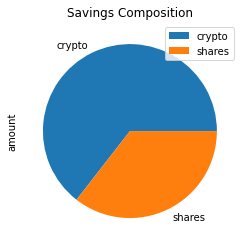

In [31]:
# Plot savings pie chart
df_savings.plot.pie(title="Savings Composition", y= 'amount')

In [32]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in this fund. You have ${total_savings - emergency_fund:0.2f} above your goal.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have met your financial goal of ${emergency_fund}.")
else:
    print(f"You are ${emergency_fund - total_savings} from reaching your goal.")

Congratulations! You have enough money in this fund. You have $84791.38 above your goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-08', tz='Australia/Melbourne').isoformat()
end_date = pd.Timestamp('2022-03-08', tz='Australia/Melbourne').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_historical = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_historical.head()

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013  273.33   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390  270.93   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377  270.90   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748  267.91   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628  264.16   

                                                              
                             high     low   close     volume  
time                                                          
2018-03-19 00:00:00-04:00  273.38  268.62  270.49   77851316  
2018-03-20 00:00:00-04:00  271.67  270.18  270.94   38399686  
2018-03-21 00:00:00-04:00  273.27  270.19  270.43   59831437  
2018-03-22 00:00:00-04:00  268.87  263.36  263.67  105012105  
2018-03-23 00:00:00-04:00  265.02  257.83  258.01  117338697

In [35]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_historical,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [37]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-19 00:00:00-04:00          NaN  273.33  273.38  268.62  270.49   
2018-03-20 00:00:00-04:00    -0.001595  270.93  271.67  270.18  270.94   
2018-03-21 00:00:00-04:00     0.000000  270.90  273.27  270.19  270.43   
2018-03-22 00:00:00-04:00     0.001880  267.91  268.87  263.36  263.67   
2018-03-23 00:00:00-04:00     0.000000  264.16  265.02  257.83  258.01   

                                                   
                              volume daily_return  
time                                               
2018-03-19 00:00:00-04:00   77851316          NaN  
2018-03-20 00:00:00-04:00   38399686     0.001664  
2018-03-21 00:00:00-04:00   59831437    -0.001882  
2018-03-22 00:00:00-04:00  105012105    -0.024997  
2018-03-23 00:00:00-04:00  117338697    -0.021466

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sarahm_44/unit-5-assignment/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009568,0.994635,1.003846,1.001285,1.005448,0.999854,0.996204,1.004835,1.010377,1.003606,...,0.996078,1.007284,0.982173,1.004519,1.002220,1.011454,0.996235,0.998067,0.998563,1.007558
2,1.024504,0.980731,0.991077,1.000683,1.020324,1.010528,0.986012,0.995176,1.013990,0.988083,...,0.986479,1.006137,0.974425,1.005136,0.993662,1.014287,0.995813,0.991255,0.997185,1.007200
3,1.027940,0.982157,1.004465,0.997718,1.003157,1.015678,0.983244,1.000439,1.012079,1.009930,...,1.005260,1.012878,0.974770,1.010379,0.994234,1.007708,0.997660,0.996330,0.985478,0.996200
4,1.034800,0.987974,0.999144,1.018032,0.993971,1.005330,0.975100,0.985296,1.009891,0.995654,...,1.007462,1.022222,0.975442,1.033192,0.998925,0.999581,1.010845,0.999586,0.989842,0.999941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.068448,21.157276,84.336385,3.605803,41.350446,29.940262,2.836491,4.490593,5.886203,10.733828,...,15.032029,7.137491,23.890064,7.080464,6.693095,8.666965,3.413706,14.075374,23.983954,9.812162
7557,8.183382,21.203510,83.327973,3.620259,40.930835,30.059173,2.841842,4.565916,6.020796,10.704896,...,15.063816,7.197810,23.811199,7.084319,6.757280,8.681097,3.466014,14.287315,24.257944,9.815241
7558,8.269383,21.088021,82.941280,3.604198,40.877999,30.434727,2.846316,4.568131,6.048106,10.733413,...,15.204965,7.242525,23.859183,7.149833,6.721498,8.802670,3.466687,14.177022,24.625678,9.952258
7559,8.254628,21.024896,83.192437,3.578660,40.722519,29.892470,2.850776,4.631545,6.062626,10.750674,...,15.266163,7.338686,24.023395,7.124136,6.782821,8.893072,3.474156,14.284214,24.845219,9.860619


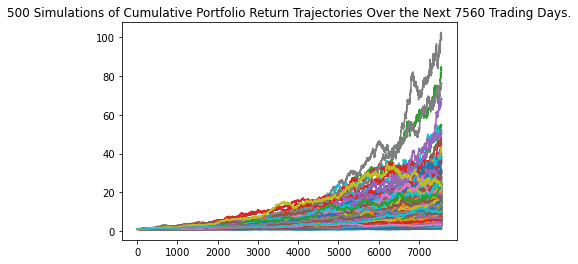

In [39]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

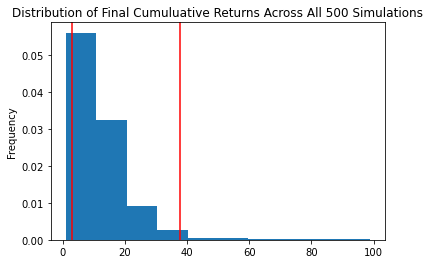

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.494757
std              10.463689
min               1.008157
25%               6.002944
50%               9.515495
75%              16.049230
max              98.872147
95% CI Lower      2.854088
95% CI Upper     37.569648
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals 
# to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16368.71 and $51655.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [66]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30k = round(tbl[8]*initial_investment,2)
ci_upper_30k = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30k} and ${ci_upper_30k}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24553.07 and $77482.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Note: Will use a $60,000 initial investment for this simulation
MC_five_year = MCSimulation(
    portfolio_data = df_historical,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_five_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-19 00:00:00-04:00          NaN  273.33  273.38  268.62  270.49   
2018-03-20 00:00:00-04:00    -0.001595  270.93  271.67  270.18  270.94   
2018-03-21 00:00:00-04:00     0.000000  270.90  273.27  270.19  270.43   
2018-03-22 00:00:00-04:00     0.001880  267.91  268.87  263.36  263.67   
2018-03-23 00:00:00-04:00     0.000000  264.16  265.02  257.83  258.01   

                                                   
                              volume daily_return  
time                                               
2018-03-19 00:00:00-04:00   77851316          NaN  
2018-03-20 00:00:00-04:00   38399686     0.001664  
2018-03-21 00:00:00-04:00   59831437    -0.001882  
2018-03-22 00:00:00-04:00  105012105    -0.024997  
2018-03-23 00:00:00-04:00  117338697    -0.021466

In [49]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sarahm_44/unit-5-assignment/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000327,1.004566,0.988359,0.995577,0.989268,1.002815,0.980882,1.010539,1.005374,0.996376,...,0.997861,0.988344,0.999848,1.002924,1.006418,0.997685,0.997007,1.000213,0.999443,1.002444
2,0.982297,1.008425,0.985447,1.004018,0.989685,1.011794,0.982797,1.018179,1.013767,0.994396,...,0.989695,0.996273,1.003423,0.997125,0.996351,0.994972,0.995198,1.006743,0.999265,0.996704
3,0.974479,1.015266,0.997283,1.020879,0.972201,1.005780,0.994195,1.008573,1.005025,0.997497,...,0.985849,0.994768,1.005960,0.979704,0.993076,0.987749,0.986889,1.004754,1.000522,0.994346
4,0.964569,1.027285,0.996181,1.005638,0.974183,0.996959,0.992625,1.014527,1.002512,0.987827,...,0.983979,0.992036,1.006625,0.973429,1.001817,0.999711,0.972602,1.001183,1.007218,0.996401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.804424,1.588743,1.247677,1.850789,1.529811,2.006745,2.416386,1.742218,1.803060,1.787650,...,1.641038,1.653154,1.448483,0.678878,2.153978,1.406837,1.049520,1.188691,0.988273,1.069599
1257,1.798449,1.612658,1.255709,1.844010,1.527407,1.982704,2.413734,1.749164,1.809633,1.780565,...,1.620101,1.673115,1.423674,0.679445,2.152290,1.407109,1.035902,1.188786,0.998185,1.061415
1258,1.794484,1.592285,1.252945,1.851543,1.529006,1.972926,2.418247,1.756089,1.796926,1.793762,...,1.609435,1.682140,1.444336,0.678924,2.152769,1.415505,1.037555,1.189297,0.996849,1.059717
1259,1.799199,1.594479,1.256992,1.852052,1.534372,1.946195,2.412929,1.762483,1.822549,1.795448,...,1.617551,1.679905,1.445123,0.679168,2.148036,1.430620,1.038236,1.183074,0.996644,1.072825


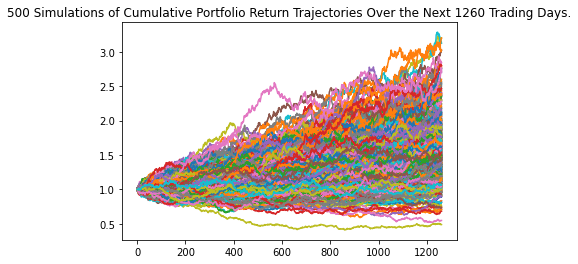

In [50]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

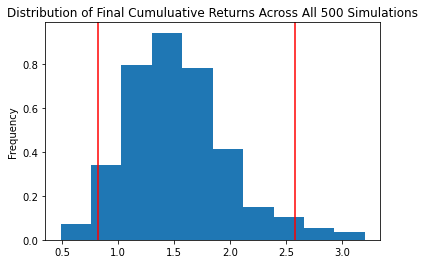

In [51]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.530907
std               0.448230
min               0.487543
25%               1.213657
50%               1.471769
75%               1.767206
max               3.201970
95% CI Lower      0.818436
95% CI Upper      2.582764
Name: 1260, dtype: float64


In [68]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to 
# calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49106.13 and $154965.86


### Ten Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Note: Will use a $60,000 initial investment for this simulation
MC_ten_year = MCSimulation(
    portfolio_data = df_historical,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Printing the simulation input data
MC_ten_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-19 00:00:00-04:00          NaN  273.33  273.38  268.62  270.49   
2018-03-20 00:00:00-04:00    -0.001595  270.93  271.67  270.18  270.94   
2018-03-21 00:00:00-04:00     0.000000  270.90  273.27  270.19  270.43   
2018-03-22 00:00:00-04:00     0.001880  267.91  268.87  263.36  263.67   
2018-03-23 00:00:00-04:00     0.000000  264.16  265.02  257.83  258.01   

                                                   
                              volume daily_return  
time                                               
2018-03-19 00:00:00-04:00   77851316          NaN  
2018-03-20 00:00:00-04:00   38399686     0.001664  
2018-03-21 00:00:00-04:00   59831437    -0.001882  
2018-03-22 00:00:00-04:00  105012105    -0.024997  
2018-03-23 00:00:00-04:00  117338697    -0.021466

In [71]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006014,1.007731,0.997493,0.987150,1.000669,0.998810,1.016211,1.007386,0.994519,1.013157,...,1.009582,0.999198,1.000843,1.008025,0.994925,0.997395,1.001998,1.007020,0.998073,0.983867
2,1.002765,1.014762,0.995765,0.991792,1.004286,0.994648,1.011641,1.005350,0.990975,1.018629,...,1.010390,1.000546,1.002128,1.009037,0.989311,0.995437,1.003014,0.996131,1.017168,0.986573
3,1.016227,1.024584,0.981850,0.982434,1.009506,1.001189,1.001898,1.006439,0.996807,1.022858,...,1.024695,1.001231,0.996258,1.012431,0.998743,0.992367,1.005472,1.000233,1.019054,0.984765
4,1.021128,1.033198,0.964368,0.976999,1.012607,1.001417,1.014541,0.993911,0.996037,1.044200,...,1.013150,0.998337,1.001748,1.011605,1.006036,0.998546,1.012308,1.017530,1.026739,0.988594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.033232,1.515738,0.772083,2.542634,1.470677,2.609638,3.674539,1.970858,1.196402,3.258880,...,1.794237,2.055292,3.191482,1.554811,2.752875,3.522383,3.655702,1.337878,0.987028,2.084350
2517,2.024304,1.501586,0.771628,2.560330,1.480949,2.609360,3.671124,1.954909,1.193366,3.256837,...,1.811117,2.049662,3.201365,1.549942,2.730501,3.532172,3.703336,1.326526,0.977295,2.060161
2518,2.034407,1.503806,0.768883,2.572776,1.491849,2.620355,3.673916,1.972608,1.197504,3.262313,...,1.817699,2.051343,3.181889,1.556278,2.748411,3.513798,3.686011,1.331051,0.976689,2.076150
2519,2.036593,1.509257,0.767189,2.556253,1.503204,2.624725,3.712548,1.957819,1.202983,3.254821,...,1.825228,2.017651,3.167777,1.568948,2.743485,3.517326,3.652257,1.335791,0.985726,2.055509


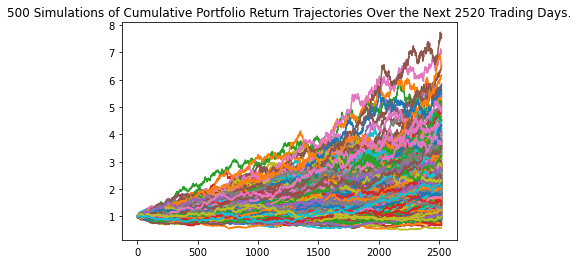

In [72]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

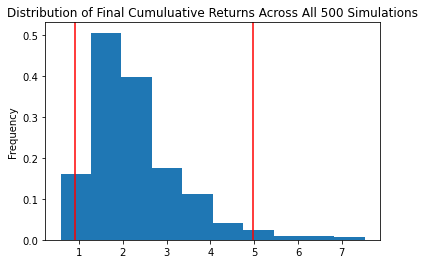

In [73]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.258431
std               1.038472
min               0.578037
25%               1.549478
50%               2.030795
75%               2.703228
max               7.527487
95% CI Lower      0.920034
95% CI Upper      4.965415
Name: 2520, dtype: float64


In [75]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $55202.01 and $297924.88
